#Aula 2

Ajustes iniciales

In [119]:
from google.colab import drive
drive.mount('/content/drive')


# Importación de bibliotecas y adjuntos
import pandas as pd

inmuebles = pd.read_csv('/content/drive/MyDrive/InmersionEnDatos/BasesDeDatos/inmuebles_bogota.csv')

# Tratamiento de la base de datos
columnas = {'Baños':'Banos','Área':'Area'}
inmuebles = inmuebles.rename(columns =columnas)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



##**Tratamiento de Datos y Primeros Gráficos**

In [120]:
# Informacion del dataset
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


###Tratamiento de la columna Valor
Al ser de tipo object(contiene strings) hay que convertirla a un tipo numerico para poder realizar operaciones con los valores

In [121]:
#Separa en un string,por defecto donde hay caracteres de espacio
inmuebles.Valor[0].split()

['$', '360.000.000']

In [122]:
# La columna es de tipo series(aunque contenga strings) asi que hay que convertirla para ejecutar .split()
# 'expand = True' devuelve el resultado en un DF
valor = inmuebles.Valor.str.split(expand = True)

In [123]:
#Agregando columnas al dataset
inmuebles['Moneda'] = valor[0]
inmuebles['Precio'] = valor[1]
inmuebles.sample(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio
6436,Apartamento,Apartamento en venta en La Calleja,3,2,82,La Calleja,USAQUÉN: Country Club + Santa Bárbara,$ 390.000.000,$,390.000.000
2243,Apartamento,Apartamento en venta en Engativa,3,2,66,Engativa,Engativá,$ 330.000.000,$,330.000.000
621,Apartamento,Apartamento en venta en Bosa,3,1,47,Bosa,Bosa Central,$ 125.000.000,$,125.000.000


In [124]:
# Precio aun es de tipo object
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
 8   Moneda        9520 non-null   object
 9   Precio        9520 non-null   object
dtypes: int64(3), object(7)
memory usage: 743.9+ KB


In [125]:
#Elimina el '.' de cada valor
inmuebles['Precio'] = inmuebles.Precio.str.replace('.', '', regex=True)

In [126]:
# Transforma el tipo de dato del Precio
#La division entre 1Millon se realiza para facilitar la comprensión de los datos
inmuebles['Precio_Millon'] = inmuebles.Precio.astype('float')/1000000
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           9520 non-null   object 
 1   Descripcion    9520 non-null   object 
 2   Habitaciones   9520 non-null   int64  
 3   Banos          9520 non-null   int64  
 4   Area           9520 non-null   int64  
 5   Barrio         9520 non-null   object 
 6   UPZ            9478 non-null   object 
 7   Valor          9520 non-null   object 
 8   Moneda         9520 non-null   object 
 9   Precio         9520 non-null   object 
 10  Precio_Millon  9520 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 818.2+ KB


In [127]:
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_Millon
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


In [128]:
pd.set_option('display.precision',2)
pd.set_option('display.float_format',lambda x:'%.2f' % x )
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_Millon
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


In [129]:
inmuebles.loc[inmuebles.Habitaciones == 110]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
897,Casa,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,$ 480.000.000,$,480000000,480.00


In [130]:
inmuebles.loc[inmuebles.Area == 2]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
8401,Apartamento,Apartamento en venta en San Cristobal,3,1,2,San Cristobal,Sosiego,$ 180.000.000,$,180000000,180.00


<Axes: ylabel='Frequency'>

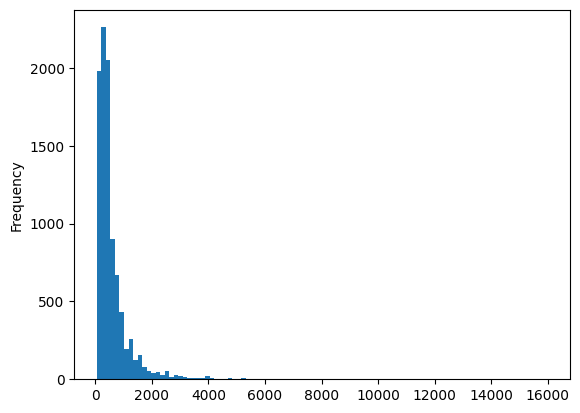

In [131]:
#Histograma
#Muestra la distribusion de la frecuencia de las variables
inmuebles['Precio_Millon'].plot.hist(bins=100)

###Otras bibliotecas para visualizar datos
Seaborn y Matplotlib

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

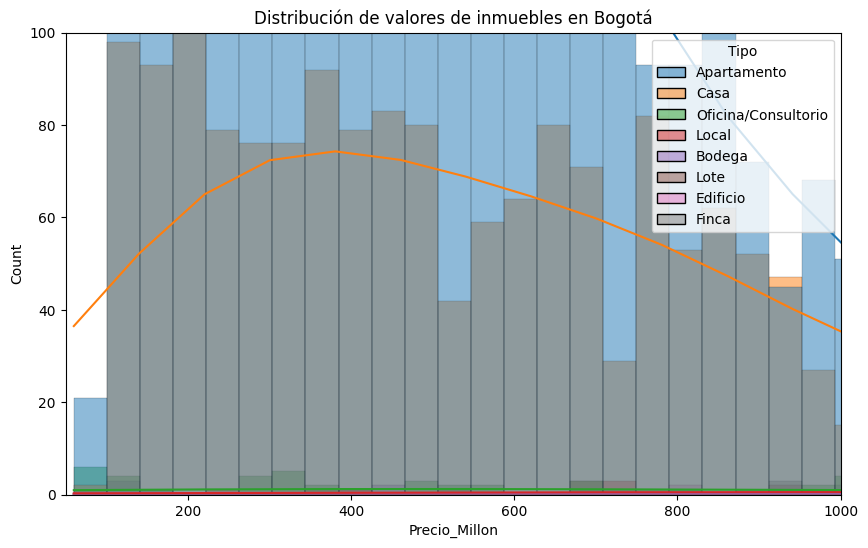

In [133]:
#lienzo de matplotlib
# Es buena practica establecer un tamaño para  la visualizacion 
plt.figure(figsize=(10,6))
grafico = sns.histplot(data=inmuebles,x='Precio_Millon',kde=True, hue='Tipo')
grafico.set_title('Distribución de valores de inmuebles en Bogotá')

#Establecer limite en el eje x de la grafica
plt.xlim((50,1000))
#Establecer limite en el eje y de la grafica
plt.ylim((0,100))

plt.savefig('/content/drive/MyDrive/InmersionEnDatos/Imagenes/grafico_de_valores.png', format='png')
plt.show()  

# Aula 3

In [134]:
#Esta es una manera de sacar el promedio del valor del m², pero de manera general 
inmuebles['Valor_m2_Millon'] = inmuebles['Precio_Millon']/inmuebles['Area']
inmuebles

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon,Valor_m2_Millon
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,360.00,5.14
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,670.00,3.94
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,1120.00,7.78
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890000000,890.00,5.78
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970000000,970.00,7.58
...,...,...,...,...,...,...,...,...,...,...,...,...
9515,Apartamento,Apartamento en venta en Kennedy,3,2,70,Kennedy,Kennedy Central,$ 290.000.000,$,290000000,290.00,4.14
9516,Apartamento,Apartamento en venta en Parque Central Bavaria,2,2,100,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,$ 670.000.000,$,670000000,670.00,6.70
9517,Local,Local en venta en Restrepo,8,6,383,Restrepo,Restrepo,$ 900.000.000,$,900000000,900.00,2.35
9518,Casa,Casa en venta en Engativa,3,2,183,Engativa,Engativá,$ 335.000.000,$,335000000,335.00,1.83


In [135]:
# Muestra el promedio de todas las columnas númericas
# Agrupadas por barrio
inmuebles.groupby('Barrio').mean()

,Habitaciones,Banos,Area,Precio_Millon,Valor_m2_Millon
Barrio,,,,,
Alameda,3.00,2.00,97.00,580.00,5.98
Alhambra,3.00,2.94,190.41,752.35,4.33
Andes Norte,3.00,2.86,124.86,709.57,6.05
Antonio Nariño,4.31,2.50,163.06,459.22,3.53
Barrancas,2.87,2.13,70.20,314.13,4.42
...,...,...,...,...,...
Villa Maria,4.69,3.69,207.15,402.85,2.04
Villas De Granada,3.45,2.32,86.59,282.30,3.17
Villemar,2.94,2.06,76.89,303.83,3.99


In [136]:
# Sumatoria de todos los datos de cada barrio
datos_barrio = inmuebles.groupby('Barrio').sum()
datos_barrio

,Habitaciones,Banos,Area,Precio_Millon,Valor_m2_Millon
Barrio,,,,,
Alameda,3,2,97,580.00,5.98
Alhambra,51,50,3237,12790.00,73.56
Andes Norte,21,20,874,4967.00,42.35
Antonio Nariño,207,120,7827,22042.65,169.47
Barrancas,43,32,1053,4712.00,66.24
...,...,...,...,...,...
Villa Maria,61,48,2693,5237.00,26.58
Villas De Granada,76,51,1905,6210.62,69.71
Villemar,53,37,1384,5469.00,71.81


In [137]:
# Al realizar la suma y luego dividir los totales de 'Precio_Millon' y 'Area'
# Notamos u cambio en los valores respecto  al proceso realizado anteriormente 
datos_barrio['Valor_m2_Barrio'] = datos_barrio['Precio_Millon']/datos_barrio['Area']
datos_barrio

,Habitaciones,Banos,Area,Precio_Millon,Valor_m2_Millon,Valor_m2_Barrio
Barrio,,,,,,
Alameda,3,2,97,580.00,5.98,5.98
Alhambra,51,50,3237,12790.00,73.56,3.95
Andes Norte,21,20,874,4967.00,42.35,5.68
Antonio Nariño,207,120,7827,22042.65,169.47,2.82
Barrancas,43,32,1053,4712.00,66.24,4.47
...,...,...,...,...,...,...
Villa Maria,61,48,2693,5237.00,26.58,1.94
Villas De Granada,76,51,1905,6210.62,69.71,3.26
Villemar,53,37,1384,5469.00,71.81,3.95


In [138]:
m2_barrio = dict(datos_barrio['Valor_m2_Barrio'])

In [139]:
inmuebles['Valor_m2_Barrio'] = inmuebles['Barrio']
inmuebles['Valor_m2_Barrio'] = inmuebles['Valor_m2_Barrio'].map(m2_barrio)
inmuebles.head(5)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon,Valor_m2_Millon,Valor_m2_Barrio
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,360.00,5.14,4.57
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,670.00,3.94,3.40
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,1120.00,7.78,8.10
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890000000,890.00,5.78,5.66
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970000000,970.00,7.58,6.29


In [140]:
#Selecciona los barrios con mas inmuebles a la venta
top_barrios = inmuebles['Barrio'].value_counts()[:10].index

In [141]:
# Restablece el indice del data frame y convierte los indices anteriores nuevamente en una columna
# Implaece=True
datos_barrio.reset_index(inplace=True)
datos_barrio

,Barrio,Habitaciones,Banos,Area,Precio_Millon,Valor_m2_Millon,Valor_m2_Barrio
0,Alameda,3,2,97,580.00,5.98,5.98
1,Alhambra,51,50,3237,12790.00,73.56,3.95
2,Andes Norte,21,20,874,4967.00,42.35,5.68
3,Antonio Nariño,207,120,7827,22042.65,169.47,2.82
4,Barrancas,43,32,1053,4712.00,66.24,4.47
...,...,...,...,...,...,...,...
144,Villa Maria,61,48,2693,5237.00,26.58,1.94
145,Villas De Granada,76,51,1905,6210.62,69.71,3.26
146,Villemar,53,37,1384,5469.00,71.81,3.95
147,Zona Franca,2,1,54,160.00,2.96,2.96


In [142]:
# Consultas con metodo .query()
# El @ hace referencia a la variable a la que estoy referenciando
datos_barrio.query('Barrio in @top_barrios')

,Barrio,Habitaciones,Banos,Area,Precio_Millon,Valor_m2_Millon,Valor_m2_Barrio
5,Barrios Unidos,1525,1196,87799,259877.76,2070.61,2.96
10,Bosa,1743,789,34879,93400.56,1654.36,2.68
22,Cedritos,1458,1348,53711,270027.73,2853.23,5.03
24,Chapinero,892,913,81248,372130.93,2466.03,4.58
50,Engativa,1676,1077,59808,172711.73,1795.71,2.89
63,Kennedy,2151,1233,61475,207963.65,2127.66,3.38
125,Santa Barbara,1073,1162,54693,320097.80,2701.88,5.85
132,Suba,1497,1202,61615,266406.04,2000.72,4.32
138,Usaquén,3109,3044,148121,837710.36,6334.04,5.66
148,Zona Noroccidental,2778,2204,119084,544453.06,4049.16,4.57


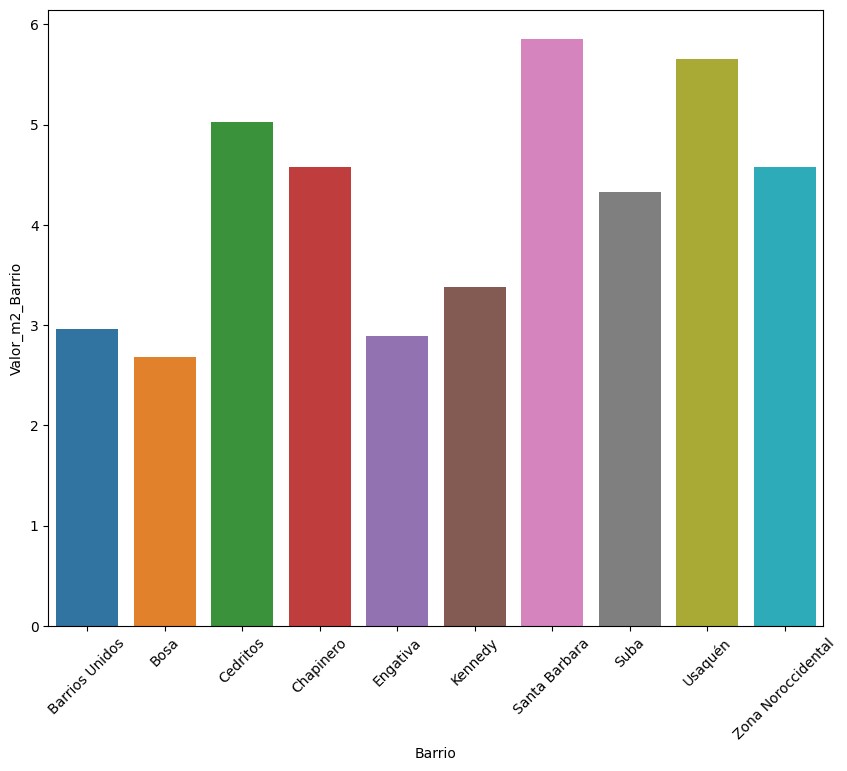

In [143]:
#Grafica el top de barrios con mayor precio por m² entre los que tienen mas inmuebles
plt.figure(figsize=(10,8))
ax = sns.barplot(x="Barrio",y="Valor_m2_Barrio", data= datos_barrio.query('Barrio in @top_barrios'))
# Ajuste de ticks o indicadores del eje x para facilitar su lectura
ax.tick_params(axis='x',rotation=45)

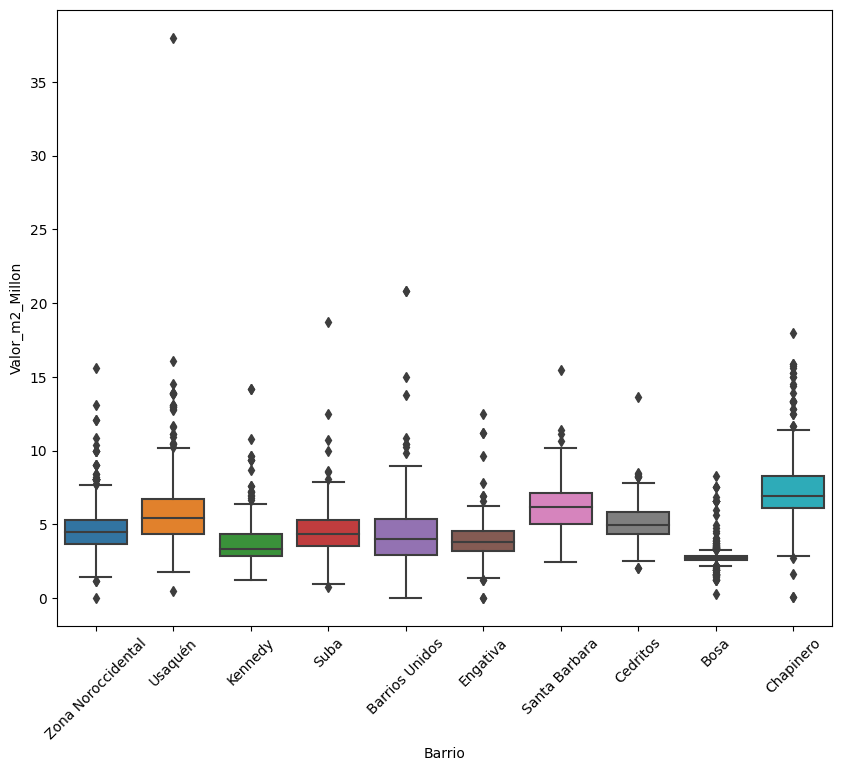

In [144]:
# Grafco de caja
#El boxplot aisla los outliers del graico 
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="Barrio",y="Valor_m2_Millon", data= inmuebles.query('Barrio in @top_barrios'))
ax.tick_params(axis='x',rotation=45)
plt.show()

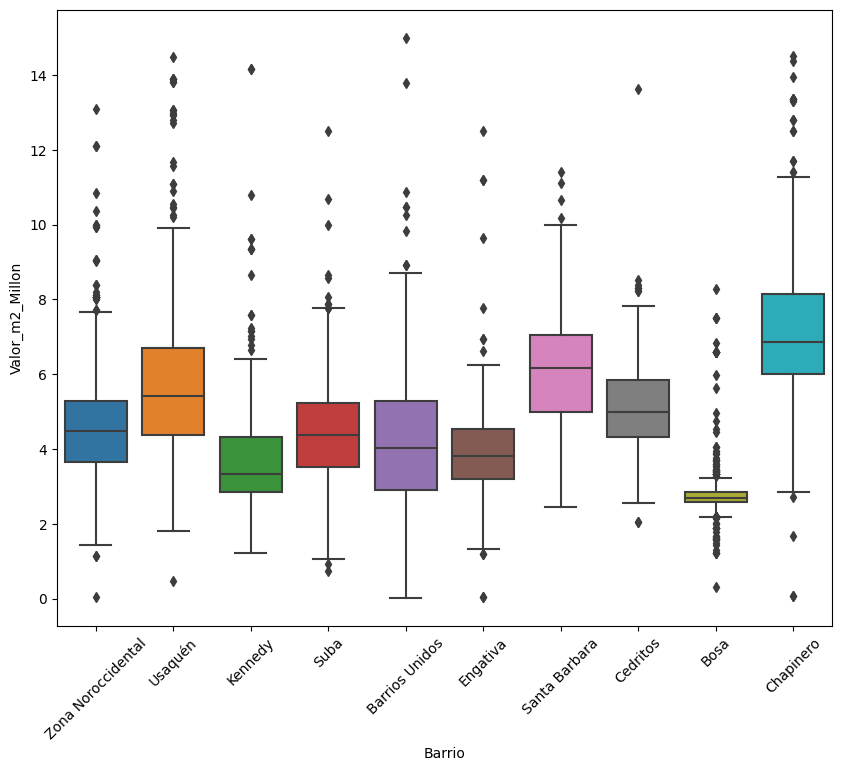

In [145]:
plt.figure(figsize=(10,8))
#Agrega filtros a a query
ax = sns.boxplot(x="Barrio",y="Valor_m2_Millon", data= inmuebles.query('Barrio in @top_barrios & Valor_m2_Millon < 15'))
ax.tick_params(axis='x',rotation=45)
plt.show()

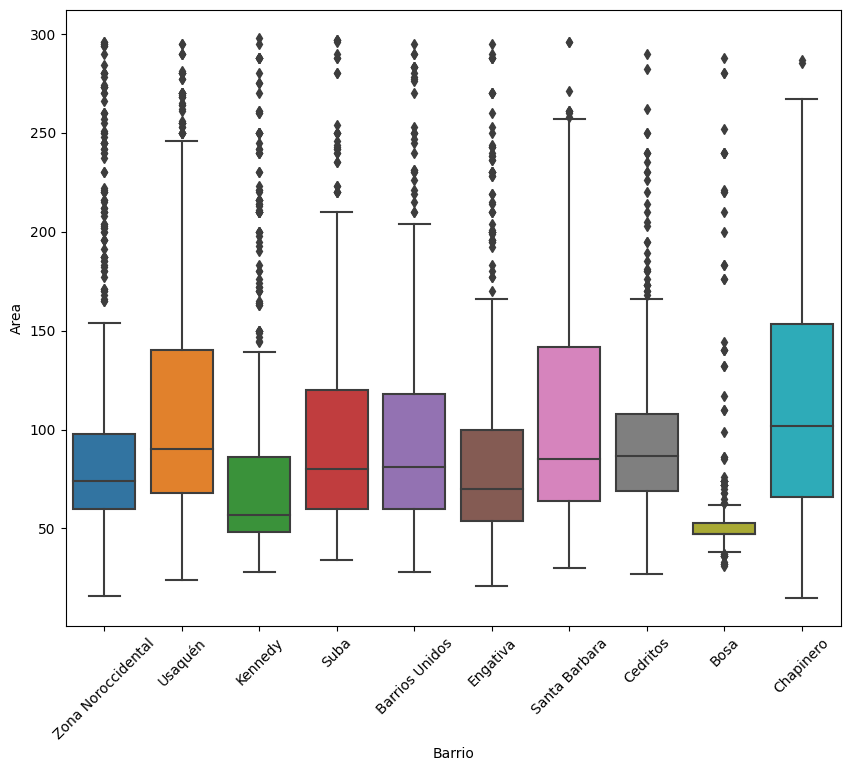

In [146]:
#Grafico de caja mostrando los valores del area de cada barrio
#Los outliers pueden afectar fuertemente el proceso de modelado, el box 
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="Barrio",y="Area", data= inmuebles.query('Barrio in @top_barrios & Area < 300'))
ax.tick_params(axis='x',rotation=45)
plt.show()

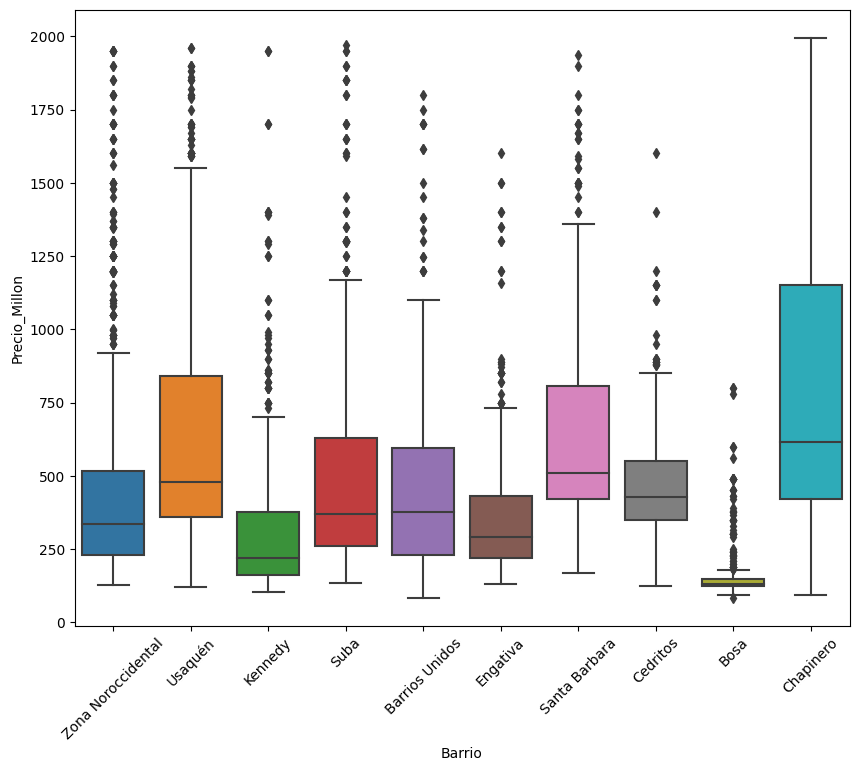

In [147]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="Barrio",y="Precio_Millon", data= inmuebles.query('Barrio in @top_barrios & Precio_Millon < 2000'))
ax.tick_params(axis='x',rotation=45)
plt.show()

##Mayor volumen de datos
El valor de python se llega a apreciar de mejor manera al manejar grandes cantidades de datos, que serian imposibles de procesar de forma tradicional

In [148]:
# La codificacion de archivos que colab maneja por defecto es utf-8 
# Si el archivo tiene una codificacion diferente, se especifica en el parametro encoding 
datos_raw = pd.read_csv('/content/drive/MyDrive/InmersionEnDatos/BasesDeDatos/archivos-dane/Identificación (Capítulo A).csv',sep = ';',encoding='latin-1')
datos_raw.head()

,DIRECTORIO,DPTO,MPIO,CLASE,COD_LOCALIDAD,NOMBRE_LOCALIDAD,COD_UPZ_GRUPO,NOMBRE_UPZ_GRUPO,ESTRATO2021,NOMBRE_ESTRATO,FEX_C
0,3004346.00,11,11001,1,3.00,Santa Fe,814.00,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"13,2266692027239"
1,3004347.00,11,11001,1,14.00,Los Mártires,37.00,Santa Isabel,11001162,Santa Isabel,"17,8555889419101"
2,3004348.00,11,11001,1,3.00,Santa Fe,814.00,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"10,0286103658331"
3,3004349.00,11,11001,1,1.00,Usaquén,803.00,USAQUÉN: Country Club + Santa Bárbara,11001176,USAQUÉN: Country Club + Santa Bárbara,"28,6502122142802"
4,3004350.00,11,11001,1,1.00,Usaquén,803.00,USAQUÉN: Country Club + Santa Bárbara,11001176,USAQUÉN: Country Club + Santa Bárbara,"24,4684068319009"


In [149]:
datos_raw.shape

(106467, 11)

In [150]:
datos_raw = datos_raw.loc[datos_raw.MPIO == 11001]
datos_raw.shape

(86504, 11)

## Importación de datos

In [151]:
datos_b = pd.read_csv( '/content/drive/MyDrive/InmersionEnDatos/BasesDeDatos/archivos-dane/Datos de la vivenda y su entorno (Capítulo B).csv' ,sep= ';' ,encoding= 'latin-1' )
datos_c = pd.read_csv( '/content/drive/MyDrive/InmersionEnDatos/BasesDeDatos/archivos-dane/Condiciones habitacionales del hogar (Capítulo C).csv' ,sep= ';' ,encoding= 'latin-1' )
datos_e = pd.read_csv( '/content/drive/MyDrive/InmersionEnDatos/BasesDeDatos/archivos-dane/Composición del hogar y demografía (Capítulo E).csv' ,sep= ';' ,encoding= 'latin-1' )
datos_h = pd.read_csv( '/content/drive/MyDrive/InmersionEnDatos/BasesDeDatos/archivos-dane/Educación (Capítulo H).csv' ,sep= ';' ,encoding= 'latin-1' )
datos_l = pd.read_csv( '/content/drive/MyDrive/InmersionEnDatos/BasesDeDatos/archivos-dane/Percepción sobre las condiciones de vida y el desempeño institucional (Capítulo L).csv' ,sep= ';' ,encoding= 'latin-1' )
datos_k = pd.read_csv( '/content/drive/MyDrive/InmersionEnDatos/BasesDeDatos/archivos-dane/Fuerza de trabajo (Capítulo K).csv' ,sep= ';' ,encoding= 'latin-1' )

<ipython-input-151-86a728d07bcd>:2: DtypeWarning: Columns (4,25,30,47) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_c = pd.read_csv( '/content/drive/MyDrive/InmersionEnDatos/BasesDeDatos/archivos-dane/Condiciones habitacionales del hogar (Capítulo C).csv' ,sep= ';' ,encoding= 'latin-1' )
<ipython-input-151-86a728d07bcd>:3: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_e = pd.read_csv( '/content/drive/MyDrive/InmersionEnDatos/BasesDeDatos/archivos-dane/Composición del hogar y demografía (Capítulo E).csv' ,sep= ';' ,encoding= 'latin-1' )
<ipython-input-151-86a728d07bcd>:4: DtypeWarning: Columns (81) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_h = pd.read_csv( '/content/drive/MyDrive/InmersionEnDatos/BasesDeDatos/archivos-dane/Educación (Capítulo H).csv' ,sep= ';' ,encoding= 'latin-1' )
<ipython-input-151-86a728d07bcd>:5: DtypeWarning: Columns (11

Mientras mas crece el dataset mas recursos consume

In [152]:
datos_dane = pd.merge(datos_raw,datos_b, on='DIRECTORIO', how='left')
datos_dane.shape  

(86504, 73)

In [153]:
datos_dane = pd.merge(datos_dane,datos_c, on='DIRECTORIO', how='left')
datos_dane.shape

(87061, 214)

In [154]:
datos_dane = pd.merge(datos_dane,datos_e, on='DIRECTORIO', how='left')
datos_dane.shape

<ipython-input-154-9f757f86689d>:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'FEX_C_x'} in the result is deprecated and will raise a MergeError in a future version.
  datos_dane = pd.merge(datos_dane,datos_e, on='DIRECTORIO', how='left')


(238559, 281)

In [155]:
datos_dane.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238559 entries, 0 to 238558
Columns: 281 entries, DIRECTORIO to FEX_C_y
dtypes: float64(140), int64(126), object(15)
memory usage: 513.3+ MB


## Desafios

1. Dar un vistazo a Ia base de datos del DANE, entender estas variables conceptualmente para entender mejor el contexto de esta base.

2. Organizar tu notebook para que tu proyecto quede mejor presentado.